<a href="https://colab.research.google.com/github/safeena-shaik/Data_Analytics-Projects/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

R² Score: -0.061672292553079266
MSE: 157900.8183954655


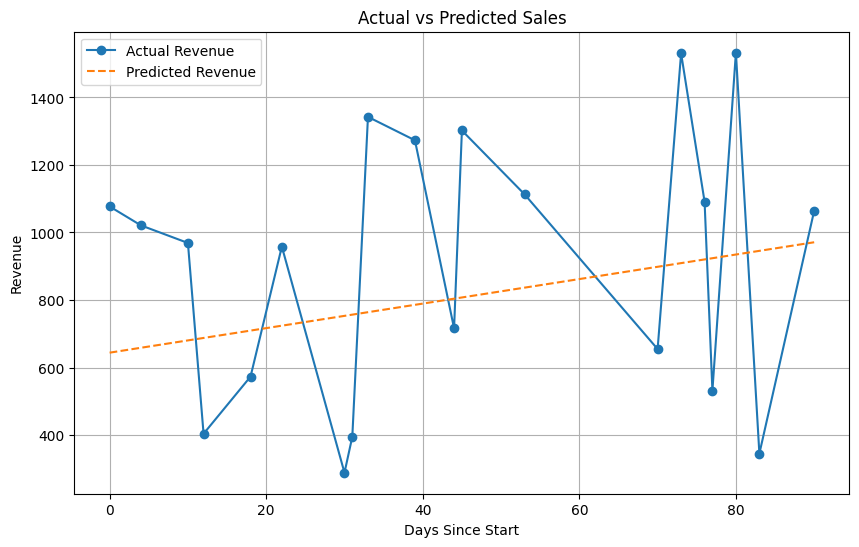

    Day  Predicted_Revenue
0   100        1007.389616
1   101        1011.022307
2   102        1014.654997
3   103        1018.287687
4   104        1021.920377
5   105        1025.553067
6   106        1029.185758
7   107        1032.818448
8   108        1036.451138
9   109        1040.083828
10  110        1043.716518
11  111        1047.349208
12  112        1050.981899
13  113        1054.614589
14  114        1058.247279
15  115        1061.879969
16  116        1065.512659
17  117        1069.145350
18  118        1072.778040
19  119        1076.410730
20  120        1080.043420
21  121        1083.676110
22  122        1087.308800
23  123        1090.941491
24  124        1094.574181
25  125        1098.206871
26  126        1101.839561
27  127        1105.472251
28  128        1109.104942
29  129        1112.737632


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
df = pd.read_excel("sample_sales_data.xlsx")
df['date'] = pd.to_datetime(df['date'])
daily_sales = df.groupby('date').agg({'quantity': 'sum', 'revenue': 'sum'}).reset_index()
daily_sales['days_since_start'] = (daily_sales['date'] - daily_sales['date'].min()).dt.days
X = daily_sales[['days_since_start']]
y = daily_sales['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
plot_df = X_test.copy()
plot_df['Actual'] = y_test
plot_df['Predicted'] = y_pred
plot_df = plot_df.sort_values('days_since_start')

plt.figure(figsize=(10, 6))
plt.plot(plot_df['days_since_start'], plot_df['Actual'], label='Actual Revenue', marker='o')
plt.plot(plot_df['days_since_start'], plot_df['Predicted'], label='Predicted Revenue', linestyle='--')
plt.xlabel("Days Since Start")
plt.ylabel("Revenue")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.grid(True)
plt.show()
last_day = daily_sales['days_since_start'].max()
future_days = np.arange(last_day + 1, last_day + 31).reshape(-1, 1)
future_preds = model.predict(future_days)
forecast_df = pd.DataFrame({
    'Day': future_days.flatten(),
    'Predicted_Revenue': future_preds
})
print(forecast_df)
